<a href="https://www.kaggle.com/code/mehrdat/drought-time-series-analysis?scriptVersionId=192812075" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-drought-meteorological-data/soil_data.csv
/kaggle/input/us-drought-meteorological-data/train_timeseries/train_timeseries.csv
/kaggle/input/us-drought-meteorological-data/validation_timeseries/validation_timeseries.csv
/kaggle/input/us-drought-meteorological-data/test_timeseries/test_timeseries.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:

train= pd.read_csv('/kaggle/input/us-drought-meteorological-data/train_timeseries/train_timeseries.csv')


test= pd.read_csv('/kaggle/input/us-drought-meteorological-data/test_timeseries/test_timeseries.csv')

data=train.copy()

In [5]:
data.head(3)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN


In [6]:
data.isnull().sum()


fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

In [7]:
data=data.drop(columns=['score','fips'])
data=data.dropna()
data=data.drop_duplicates()
data.isnull().sum()


date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
dtype: int64

In [8]:
data['date']=pd.to_datetime(data['date'])
data=data.set_index('date')
data.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
date,,,,,,,,,,,,,,,,,,
2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81
2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41
2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66
2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58
2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19


# The most important features


<Axes: >

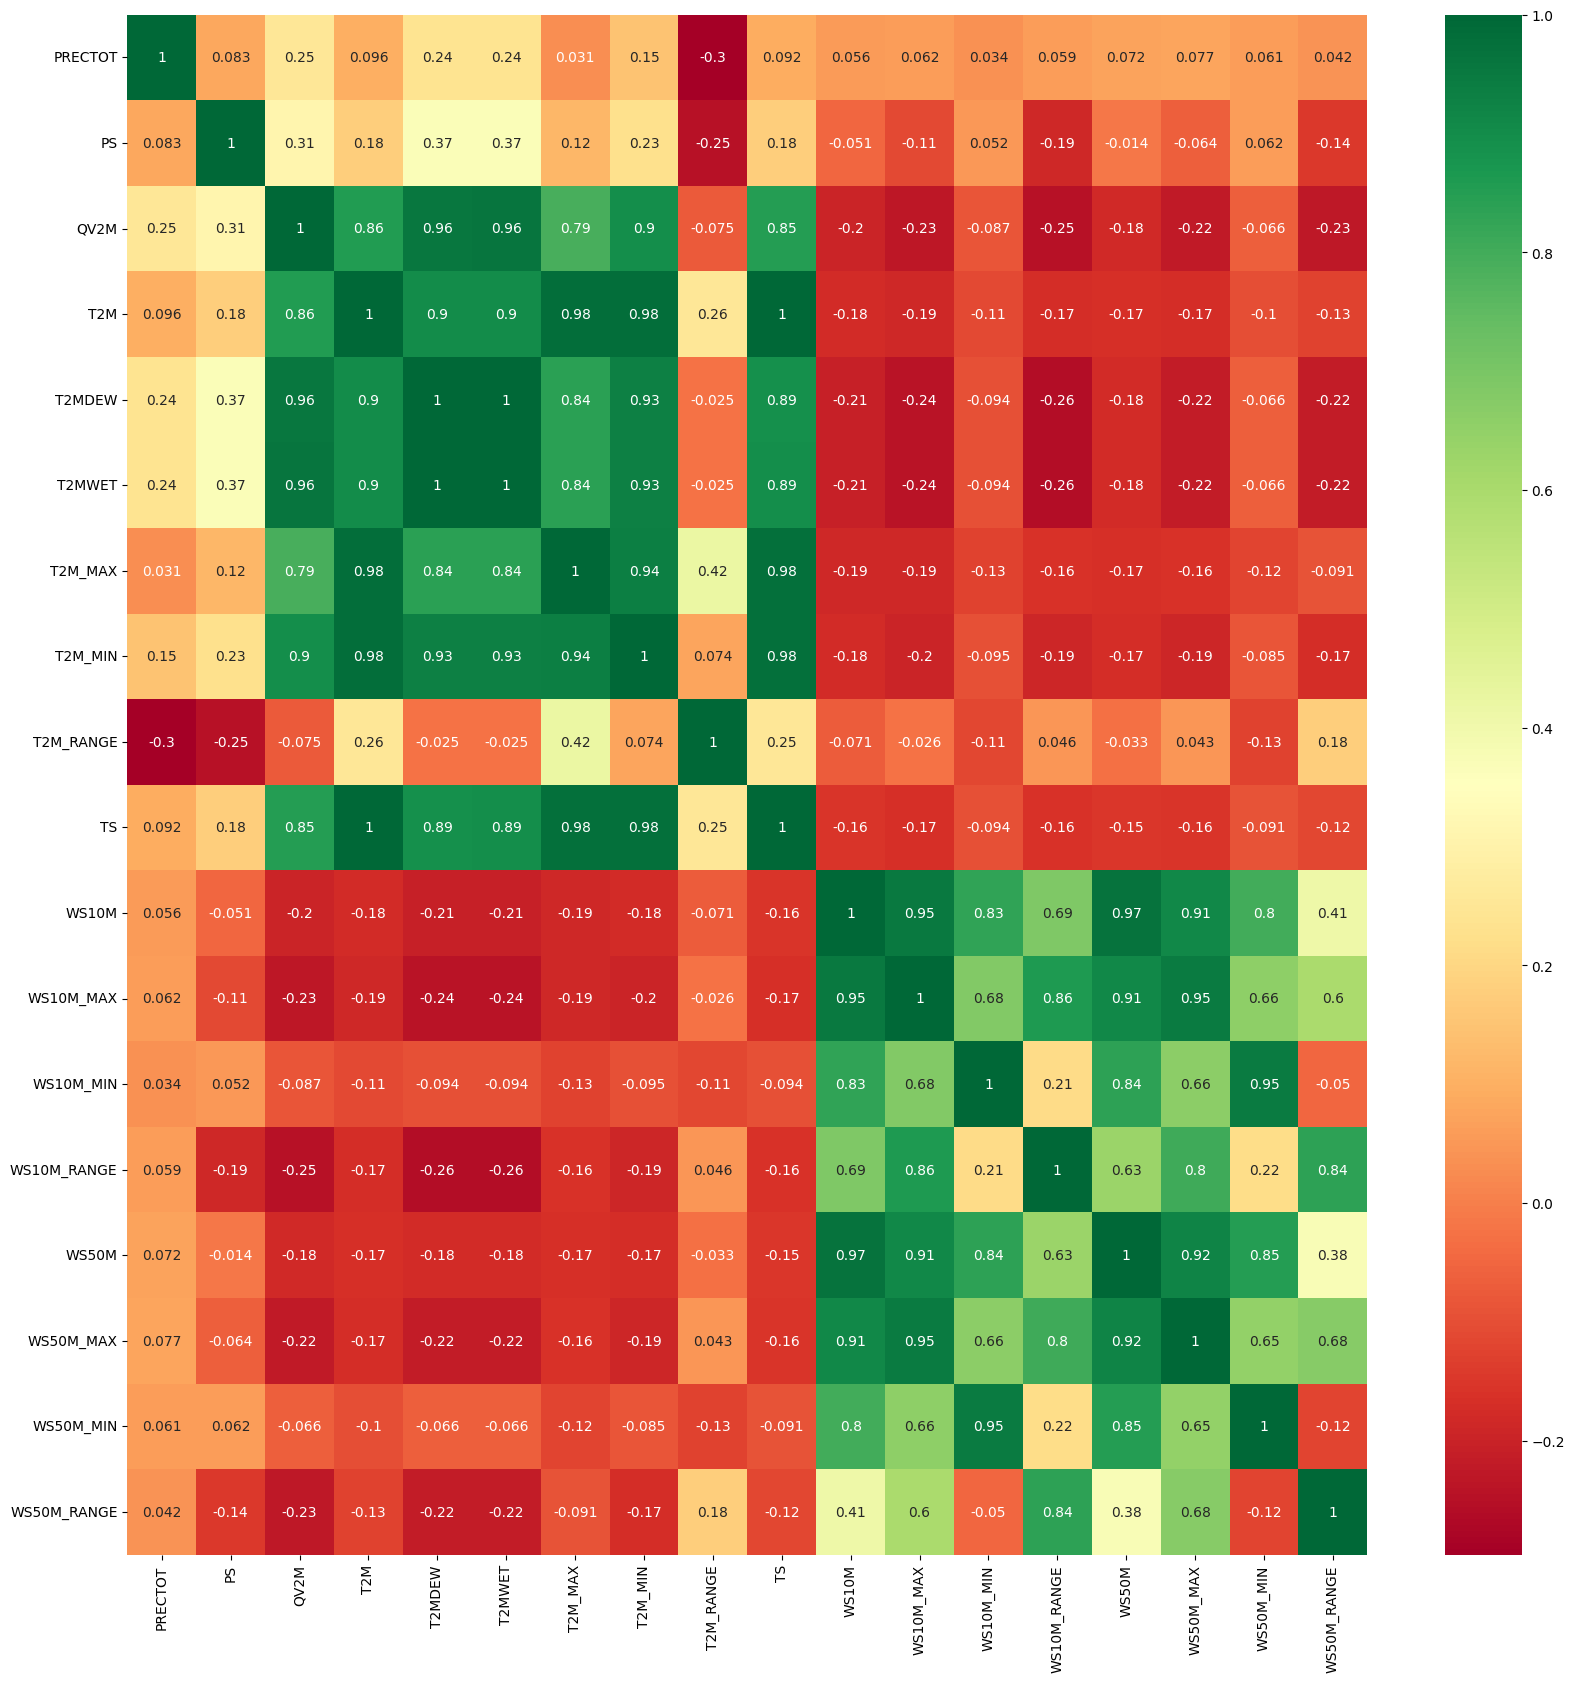

In [9]:
correlatio=data.corr()

top_corr_features = correlatio.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [10]:
# data1=data.sample(frac=.5)
# X=data1.drop(columns=['PRECTOT'],axis=1)
# y=data1['PRECTOT']



data=data.sample(frac=.2)
X=data.drop(columns=['PRECTOT'],axis=1)
y=data['PRECTOT']

In [11]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# model.fit(X, y)
# print(model.feature_importances_)  # use inbuilt class feature_importances of tree based classifiers

Feature 0: 0.04162721335887909
Feature 1: 0.1769939810037613
Feature 2: 0.08439342677593231
Feature 3: 0.026407528668642044
Feature 4: 0.02428739331662655
Feature 5: 0.11810421198606491
Feature 6: 0.05018347129225731
Feature 7: 0.14281389117240906
Feature 8: 0.034229911863803864
Feature 9: 0.022336438298225403
Feature 10: 0.024463653564453125
Feature 11: 0.023229317739605904
Feature 12: 0.027534721419215202
Feature 13: 0.03784666210412979
Feature 14: 0.05029460787773132
Feature 15: 0.022897806018590927
Feature 16: 0.09235578030347824


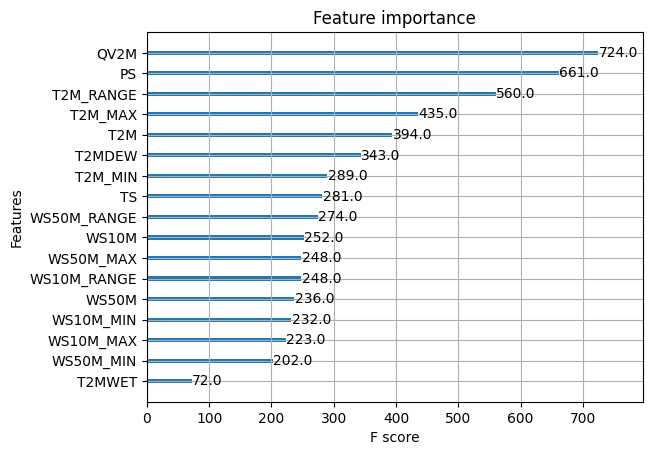

In [12]:
import xgboost as xgb
data2=data.sample(200000,replace=False)

X=data2.drop(columns=['PRECTOT'],axis=1)
y=data2['PRECTOT']

#Assume you have a trained model 'model'
model = xgb.XGBRegressor()  
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Print feature importance
for i, score in enumerate(importance):
    print(f'Feature {i}: {score}')

# If you have feature names, you can display them as well
# for name, score in zip(feature_names, importance):
#     print(f'Feature {name}: {score}')

xgb.plot_importance(model)
plt.show()

In [13]:
from sklearn.feature_selection import RFE
import xgboost as xgb

# Create a XGBoost model
model = xgb.XGBRegressor()

# Create the RFE object and rank each feature
rfe = RFE(estimator=model, n_features_to_select=3)
fit = rfe.fit(X, y)

# Print the results
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

import numpy as np

# Assuming X is a pandas DataFrame and you have feature names in it
feature_names = np.array(X.columns)

# Get the names of the selected features
selected_features = feature_names[fit.support_]

print("Selected Features: %s" % selected_features)

Num Features: 3
Selected Features: [False  True False False False  True False  True False False False False
 False False False False False]
Feature Ranking: [ 5  1  2  9 11  1  4  1  7 15 10 13 12  8  6 14  3]
Selected Features: ['QV2M' 'T2M_MAX' 'T2M_RANGE']


In [14]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Select 17 features with highest mutual information
select_feature = SelectKBest(score_func=mutual_info_regression, k=17)
fit = select_feature.fit(X, y)

In [15]:
import numpy as np

# Assuming X is a pandas DataFrame and you have feature names in it
feature_names = np.array(X.columns)

# Get the scores of all features
scores = fit.scores_

# Get the names of the selected features
selected_features = feature_names[fit.get_support()]

# Print the scores and names of the selected features
for name, score in zip(selected_features, scores[fit.get_support()]):
    print(f'Feature {name}: {score}')

Feature PS: 0.0204315015045875
Feature QV2M: 0.07450252514540168
Feature T2M: 0.0271705420872852
Feature T2MDEW: 0.07054777724342554
Feature T2MWET: 0.07149631618009966
Feature T2M_MAX: 0.025732231249962823
Feature T2M_MIN: 0.03341805979080359
Feature T2M_RANGE: 0.1273431425104059
Feature TS: 0.030815468977294813
Feature WS10M: 0.007800291963689254
Feature WS10M_MAX: 0.006632232417578265
Feature WS10M_MIN: 0.0
Feature WS10M_RANGE: 0.004112171241470897
Feature WS50M: 0.0040281352683742
Feature WS50M_MAX: 0.009531557376219801
Feature WS50M_MIN: 0.00147573987205174
Feature WS50M_RANGE: 0.008254538622846752


In [16]:
data.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
date,,,,,,,,,,,,,,,,,,
2004-01-18,0.00,79.00,2.09,-1.19,-10.48,-10.25,6.09,-5.79,11.88,-1.86,2.44,3.80,1.23,2.57,3.78,5.87,1.00,4.87
2006-12-20,0.40,79.14,1.84,-10.95,-12.01,-11.98,-4.05,-15.44,11.39,-15.18,2.49,3.88,1.19,2.69,3.73,6.33,1.86,4.47
2005-09-15,0.00,79.56,3.66,14.40,-3.72,-3.61,23.06,6.30,16.76,13.76,2.20,3.71,0.70,3.01,3.09,4.68,0.56,4.12
2006-04-22,0.00,95.44,10.69,21.76,14.15,14.15,29.62,13.06,16.56,22.55,5.02,6.44,3.09,3.35,7.44,8.93,5.38,3.56
2006-09-17,0.32,95.86,6.40,17.19,6.23,6.25,22.34,13.38,8.96,17.25,6.29,10.66,0.76,9.90,8.33,13.39,1.14,12.25


In [17]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
def decompose_series(df, var, period):
    analysis = df[var]
    decompose_result_mult = seasonal_decompose(analysis, model="additive", period=period, extrapolate_trend='freq')
    trend = decompose_result_mult.trend
    season = decompose_result_mult.seasonal
    resid = decompose_result_mult.resid
    
    return trend, season, resid


In [19]:
#tr, sea, resid=decompose_series(data, 'QV2M', 50)
#pd.DataFrame({'Trend':tr,'season':sea,'residual':resid}).plot()

## ARIMA

In [20]:
data.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
date,,,,,,,,,,,,,,,,,,
2004-01-18,0.00,79.00,2.09,-1.19,-10.48,-10.25,6.09,-5.79,11.88,-1.86,2.44,3.80,1.23,2.57,3.78,5.87,1.00,4.87
2006-12-20,0.40,79.14,1.84,-10.95,-12.01,-11.98,-4.05,-15.44,11.39,-15.18,2.49,3.88,1.19,2.69,3.73,6.33,1.86,4.47
2005-09-15,0.00,79.56,3.66,14.40,-3.72,-3.61,23.06,6.30,16.76,13.76,2.20,3.71,0.70,3.01,3.09,4.68,0.56,4.12
2006-04-22,0.00,95.44,10.69,21.76,14.15,14.15,29.62,13.06,16.56,22.55,5.02,6.44,3.09,3.35,7.44,8.93,5.38,3.56
2006-09-17,0.32,95.86,6.40,17.19,6.23,6.25,22.34,13.38,8.96,17.25,6.29,10.66,0.76,9.90,8.33,13.39,1.14,12.25


In [21]:

from statsmodels.tsa.stattools import adfuller

#data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')

# Remove duplicate index labels
data= data[~data.index.duplicated(keep='first')]
#data.index = pd.to_datetime(data.index, format='%Y')
data=data.resample('M').asfreq()
data.head()


/tmp/ipykernel_34/635978594.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data=data.resample('M').asfreq()


,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
date,,,,,,,,,,,,,,,,,,
2000-01-31,2.33,84.44,3.66,-1.69,-2.87,-2.86,2.15,-5.71,7.86,-1.75,3.74,5.42,2.22,3.21,5.66,7.11,3.94,3.18
2000-02-29,0.00,83.16,1.95,6.45,-11.09,-10.46,16.59,-1.53,18.12,7.67,3.54,5.37,0.87,4.50,5.35,7.84,1.14,6.70
2000-03-31,4.10,94.53,7.47,13.30,8.65,8.65,19.88,7.42,12.46,14.09,5.81,8.33,3.88,4.44,7.57,10.26,5.17,5.09
2000-04-30,13.13,88.46,6.96,11.76,6.18,6.18,15.48,7.41,8.06,12.44,7.51,12.49,2.49,10.00,9.76,15.37,3.20,12.18
2000-05-31,4.79,89.18,10.34,27.45,12.69,12.69,33.62,20.50,13.12,30.10,3.62,5.51,2.11,3.40,4.91,8.08,3.34,4.74


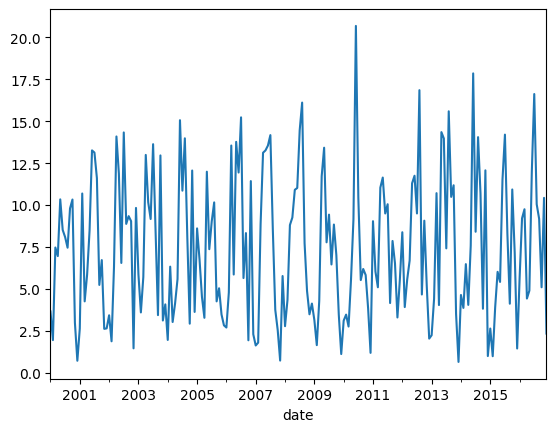

The p-value for the ADF test is  9.361416704625013e-22
The whole result for the ADF test is  (-11.80038319486797, 9.361416704625013e-22, 6, 197, {'1%': -3.463987334463603, '5%': -2.8763259091636213, '10%': -2.5746515171738515}, 992.3330853198593)


In [22]:
# Plot average temperatures
data['QV2M'].plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(data['QV2M'])
print("The p-value for the ADF test is ", result[1])
print("The whole result for the ADF test is ", result)


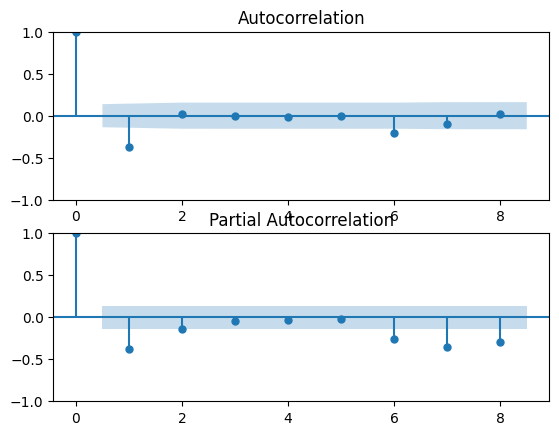

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

chg_temp = data['QV2M'].diff()
chg_temp = chg_temp.dropna()

fig, axes = plt.subplots(2,1)

n_obs = len(chg_temp)

# Set the number of lags to the minimum of 20 or the length of the series
lags = min(8, n_obs - 1)

#  ACF
plot_acf(chg_temp, lags=lags, ax=axes[0])

# PACF
plot_pacf(chg_temp, lags=lags, ax=axes[1])
plt.show()

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(chg_temp, order=(1, 0, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(chg_temp, order=(2, 0, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(chg_temp,order=(1,0,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

mod_arma111 = ARIMA(chg_temp,order=(1,1,1))
res_arma111 = mod_arma111.fit()
print("The AIC for an ARMA(1,1,1) is: ", res_arma111.aic)

mod_arma211 = ARIMA(chg_temp,order=(2,1,1))
res_arma211 = mod_arma211.fit()
print("The AIC for an ARMA(2,1,1) is: ", res_arma211.aic)

mod_arma201 = ARIMA(chg_temp,order=(2,0,1))
res_arma201 = mod_arma201.fit()
print("The AIC for an ARMA(2,0,1) is: ", res_arma201.aic)

mod_arma002 = ARIMA(chg_temp,order=(0,0,2))
res_arma002 = mod_arma002.fit()
print("The AIC for an ARMA(0,0,2) is: ", res_arma002.aic)

The AIC for an AR(1) is:  1188.3456109954948
The AIC for an AR(2) is:  1186.576222631336
The AIC for an ARMA(1,1) is:  1145.3589258200764
The AIC for an ARMA(1,1,1) is:  1189.469958549397
The AIC for an ARMA(2,1,1) is:  1187.9685770973988


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The AIC for an ARMA(2,0,1) is:  1146.2284890898113
The AIC for an ARMA(0,0,2) is:  1150.7683877350978


In [25]:
import warnings
# Turn off all warnings
warnings.filterwarnings("ignore")
pair=[]
for p in range(5):
    for q in range(5):
        for d in range(3):
            mod_arma = ARIMA(chg_temp,order=(p,d,q))
            res_arma = mod_arma.fit()
            pair.append((p,d,q,res_arma.aic,res_arma.bic))
            #print(f"AIC ARMA({p,d,q}) is: { res_arma.aic}, BIC ARMA({p,d,q}) is: { res_arma.bic}")
            

In [26]:
optimum=min(pair,key=lambda p: p[3]+p[3])
optimum

(3, 0, 4, 1072.2544216982012, 1102.0732755095773)

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(data['QV2M'], trend='t', order=(2,0,4))
res = mod.fit()



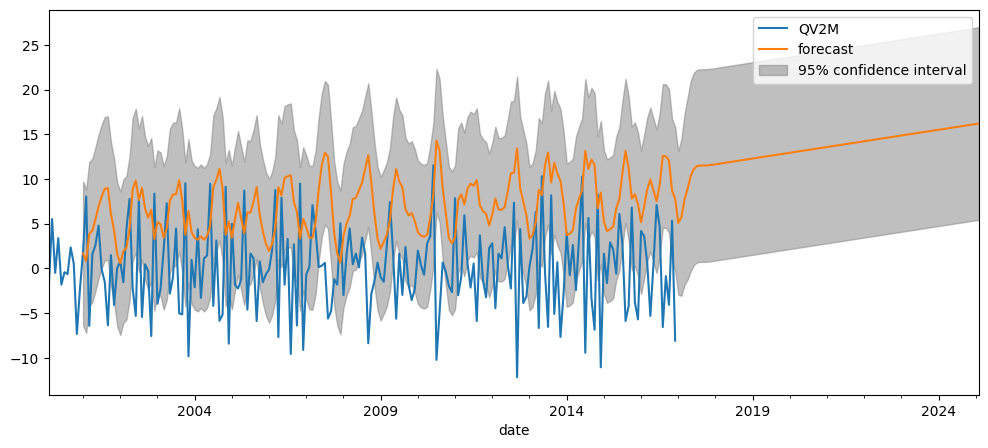

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31'],
              dtype='datetime64[ns]', freq='ME')


In [28]:
fig, ax = plt.subplots(figsize=(12, 5))
#fig=plt.figsize(12,10)
chg_temp.plot(ax=ax)
plot_predict(res, start='2001-01', end='2025-02', ax=ax)




one_step_forecast = res.get_prediction(start=-60)
mean_forecast = one_step_forecast.predicted_mean

confidence_intervals = one_step_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower QV2M']
upper_limits = confidence_intervals.loc[:,'upper QV2M']


forcast_diff=res.get_forecast(steps=20)
#plt.plot(forcast_diff.index,forcast_diff.tvalues)

plt.plot(forcast_diff.tvalues.index,forcast_diff.tvalues.values)
#print(mean_forecast)
plt.show()
print(forcast_diff.tvalues.index)
print(forcast_diff)


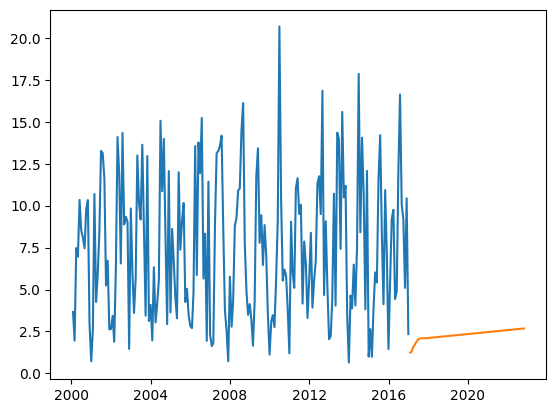

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31'],
              dtype='datetime64[ns]', freq='ME')


In [29]:
mod = ARIMA(data['QV2M'], trend='t', order=(2,0,4))
res = mod.fit()


plt.plot(data.index,data['QV2M'])

pred = res.get_prediction(start=-60)
#mean_forecast = one_step_forecast.predicted_mean


forcast_=res.get_forecast(steps=70)
#plt.plot(forcast_diff.index,forcast_diff.tvalues)

plt.plot(forcast_.tvalues.index,forcast_.tvalues.values)
#print(mean_forecast)
plt.show()
print(forcast_diff.tvalues.index)
print(forcast_diff)

In [30]:
adfuller(data['QV2M'])
#data['QV2M'].plot()
#ARIMA()

(-11.80038319486797,
 9.361416704625013e-22,
 6,
 197,
 {'1%': -3.463987334463603,
  '5%': -2.8763259091636213,
  '10%': -2.5746515171738515},
 992.3330853198593)

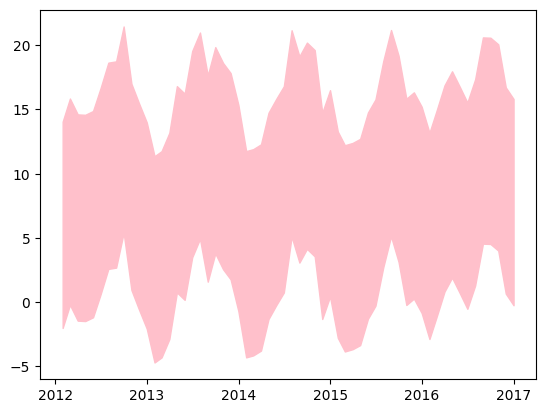

In [31]:
plt.fill_between(lower_limits.index, lower_limits,upper_limits, color='pink')

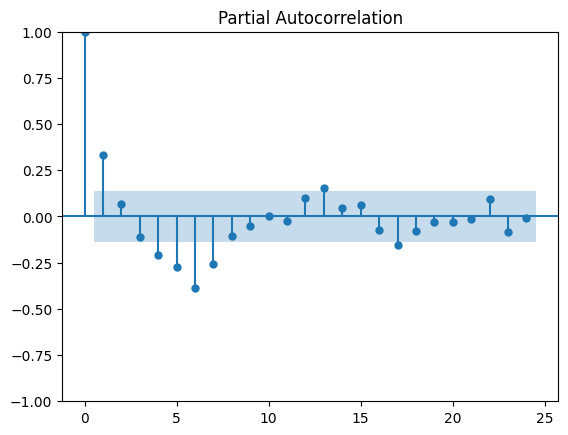

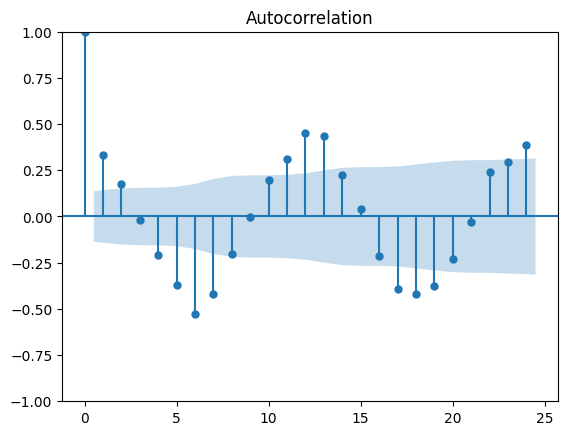

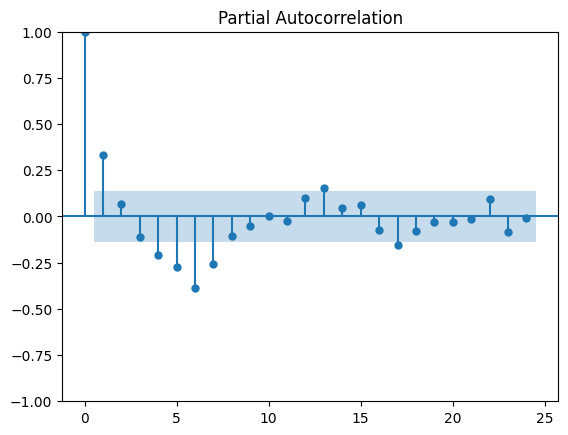

In [32]:
plot_acf(data['QV2M'])
plot_pacf(data['QV2M'])

In [33]:
res=ARIMA(data['QV2M'],order=(2,0,4)).fit()

In [34]:
mae=np.mean(np.abs(res.resid))
mae

2.571764765442606

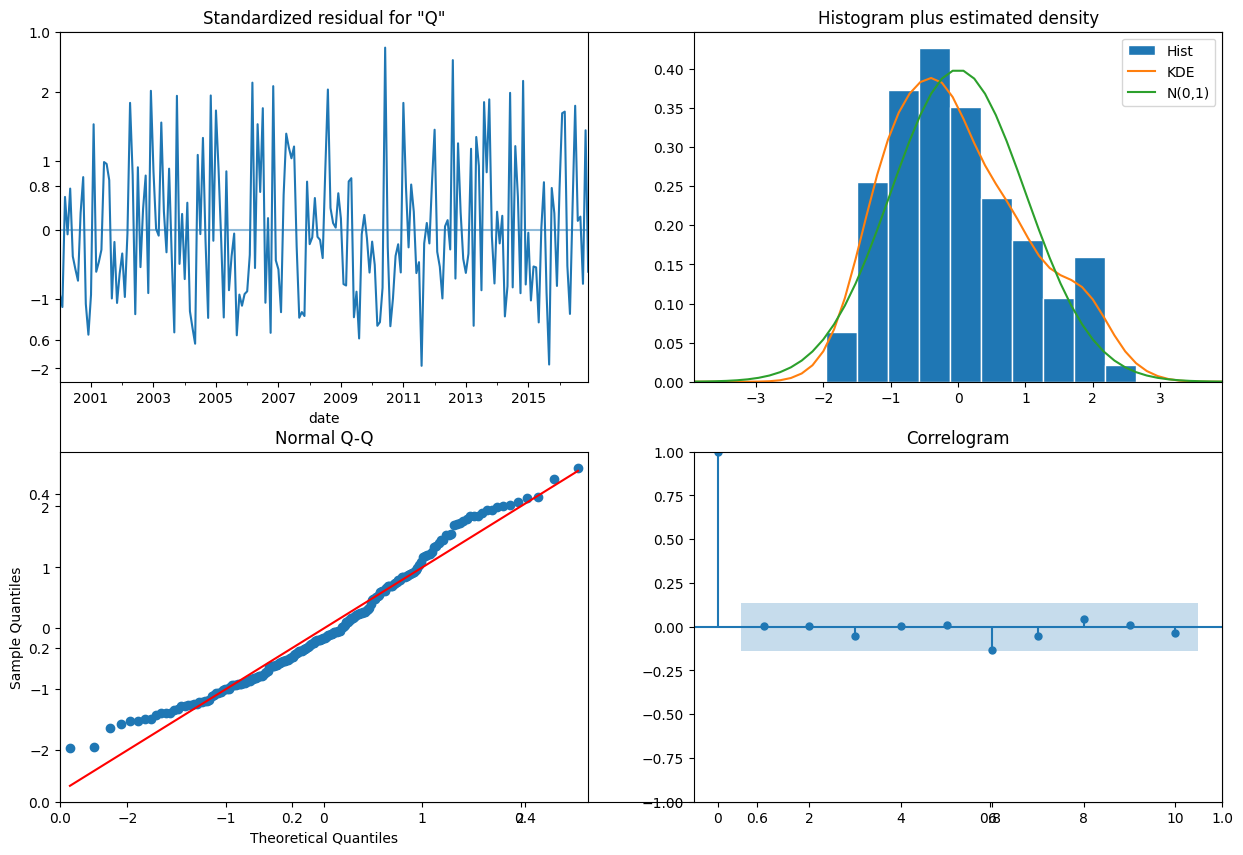

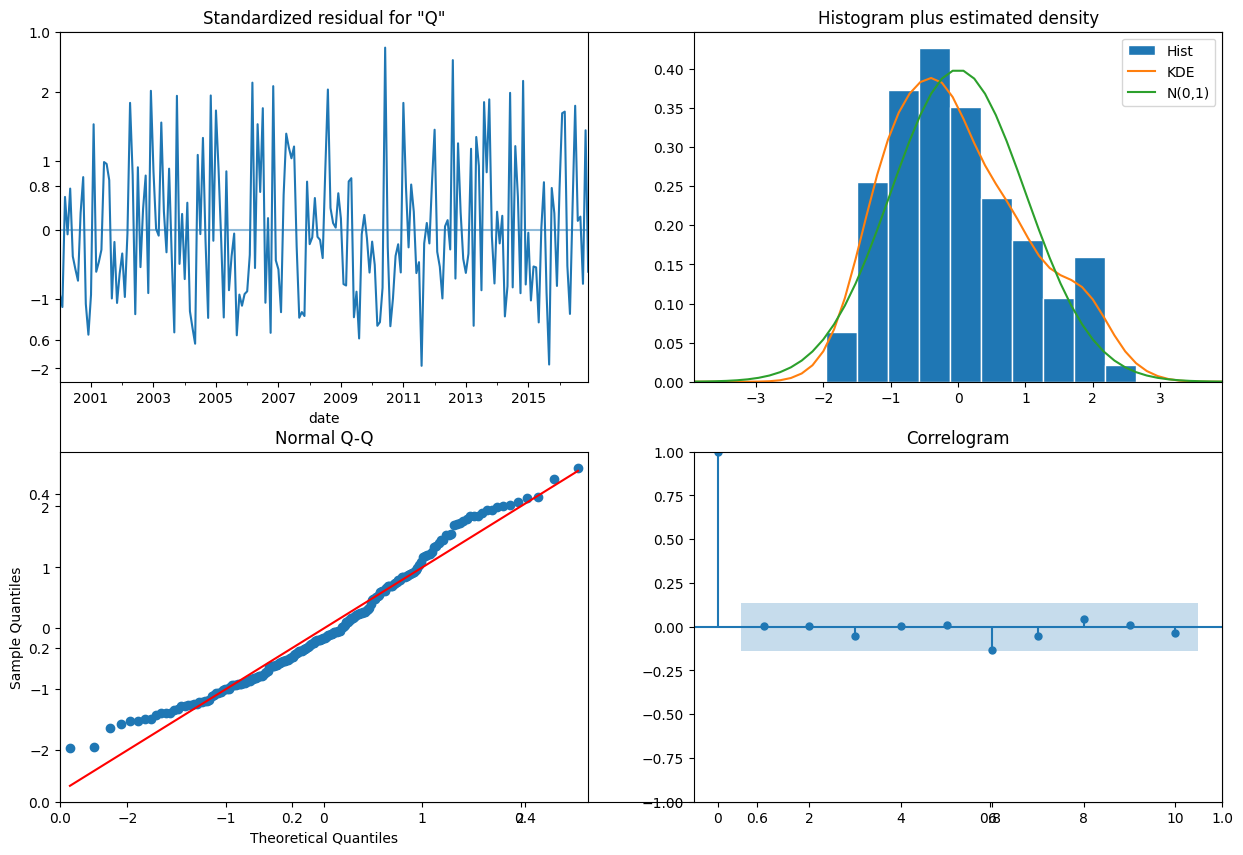

In [35]:
res=ARIMA(data['QV2M'],order=(2,0,4)).fit()
fig, ax = plt.subplots(figsize=(15, 10))
res.plot_diagnostics(fig=fig)

The model seems ok,and intuitively correct.

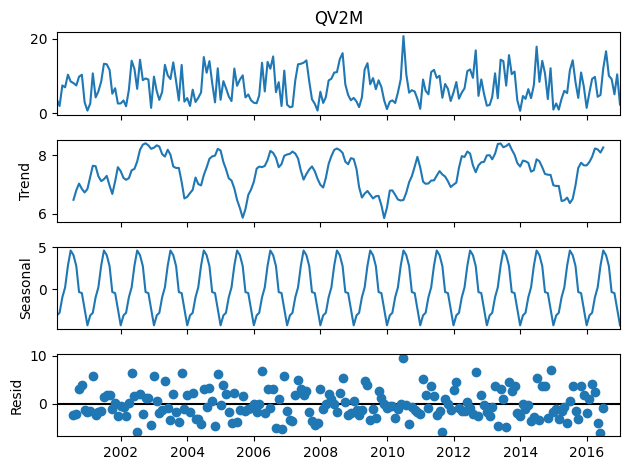

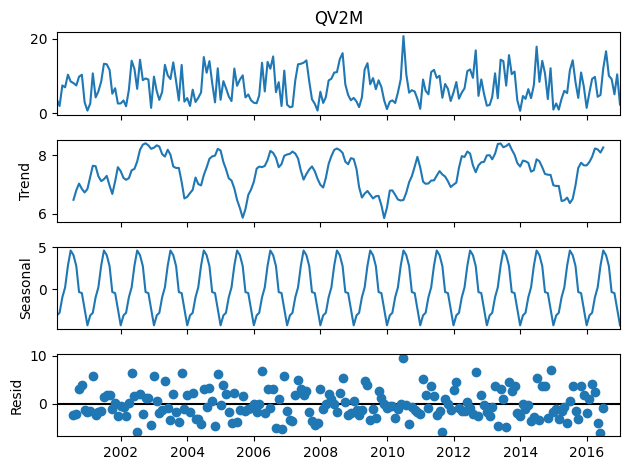

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(data['QV2M'], period=12)
decomp.plot()

In [37]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.0 MB/s eta 0:00:0000:0100:01


In [38]:
import pmdarima as pm

result=pm.auto_arima(data['QV2M'],seasonal=True,D=1,max_p=5,max_q=5,trace=True,error_action='ignore',supress_warning=True,
                    start_p=0,start_q=0,start_d=0,max_d=5,start_P=1,start_Q=0,max_Q=5,max_P=5,start_D=0,max_D=5,
                     m=12,
                    information_criterion='aic',stepwise=True)


result.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1070.357, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1111.437, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1070.972, Time=0.41 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1109.563, Time=0.07 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1059.630, Time=0.82 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=1042.143, Time=1.88 sec
 ARIMA(0,0,0)(4,1,0)[12] intercept   : AIC=1039.989, Time=2.67 sec
 ARIMA(0,0,0)(5,1,0)[12] intercept   : AIC=1037.383, Time=4.60 sec
 ARIMA(0,0,0)(5,1,1)[12] intercept   : AIC=inf, Time=16.72 sec
 ARIMA(0,0,0)(4,1,1)[12] intercept   : AIC=inf, Time=10.19 sec
 ARIMA(1,0,0)(5,1,0)[12] intercept   : AIC=1038.032, Time=6.29 sec
 ARIMA(0,0,1)(5,1,0)[12] intercept   : AIC=1037.722, Time=6.09 sec
 ARIMA(1,0,1)(5,1,0)[12] intercept   : AIC=1034.353, Time=11.24 sec
 ARIMA(1,0,1)(4,1,0)[12] interc

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  204
Model:             SARIMAX(1, 0, 1)x(5, 1, [], 12)   Log Likelihood                -508.408
Date:                             Thu, 15 Aug 2024   AIC                           1032.817
Time:                                     23:40:15   BIC                           1058.877
Sample:                                 01-31-2000   HQIC                          1043.371
                                      - 12-31-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8107      0.101      8.058      0.000       0.614       1.008
ma.L1         -0.9305      0.074    -12.625      0.000      -1.075      -0.786
ar.S.L12      -0.7535      0.083     -9.113      0.000      -0.916      -0.591
ar.S.L24      -0.6113      0.107     -5.734      0.000      -0.820      -0.402
ar.S.L36      -0.5520      0.109     -5.078      0.000      -0.765      -0.339
ar.S.L48      -0.3046      0.121     -2.519      0.012      -0.542      -0.068
ar.S.L60      -0.1698      0.095     -1.784      0.074      -0.356       0.017
sigma2        10.9066      1.288      8.465      0.000       8.381      13.432
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.86
Prob(Q):                              0.91   Prob(JB):                         0.05
Heteroskedasticity (H):               0.95   Skew:                             0.37
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

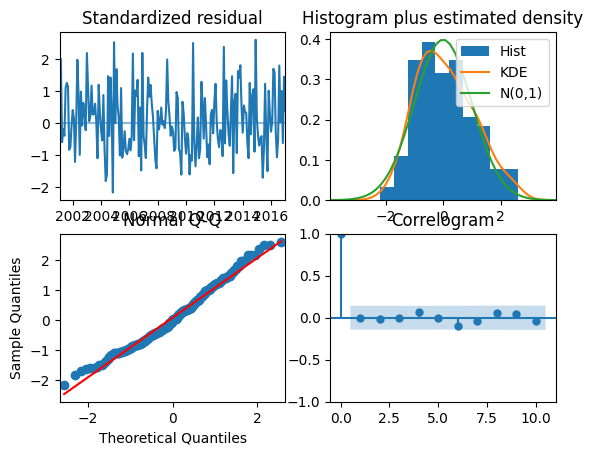

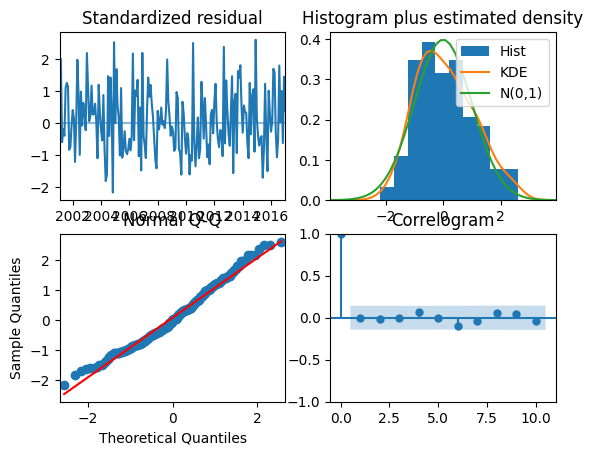

In [39]:
result.plot_diagnostics()

In [40]:
import joblib 

joblib.dump(result,'model.pkl')

['model.pkl']

# **Torch Training**

In [41]:
# prompt: import all needed torch libraries and classes and methodes that i want to train a time series
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
device='cuda' if torch.cuda.is_available() else 'cpu'

In [42]:
data.shape

(204, 18)

This is the RAW code. just for start the next round of run will be legit!

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def preprocess_data(data):

  data=data.drop(columns=['score','fips'])
  data=data.dropna()
  data=data.drop_duplicates()
  data.isnull().sum()

  data['date']=pd.to_datetime(data['date'])
  data=data.set_index('date')

  data=data.resample('D').mean()
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)
  scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
  X=scaled_data.drop(columns=['PRECTOT'],axis=1)
  y=scaled_data['PRECTOT']
  return X,y




X_test,y_test=preprocess_data(test)
X_train,y_train=preprocess_data(train)


#dataset
#dataloader

class DroughtDataset(Dataset):
  def __init__(self,X_data,y_data):
    self.X_data=X_data
    self.y_data=y_data

  def __getitem__(self,idx):
      return self.X_data[idx],self.y_data[idx]

  def __len__(self):
      return len(self.X_data)

train_dataset=DroughtDataset(torch.tensor(X_train.values),torch.tensor(y_train.values))
test_dataset=DroughtDataset(torch.tensor(X_test.values),torch.tensor(y_test.values))

batch_size=64
input_size=X_train.shape[1]
num_layers=2
hidden_size=256
output_size=1

train_dataloader=DataLoader(train_dataset,batch_size,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size,shuffle=True)



class DroughtModel(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers,output_size):
    super(DroughtModel,self).__init__()
    self.hidden_size=hidden_size
    self.num_layers=num_layers
    self.lstm=nn.LSTM(input_size,hidden_size,num_layers,batch_first=True)
    self.linear=nn.Linear(hidden_size,256)
    self.relu=nn.ReLU()
    self.fc=nn.Linear(256,output_size)


  def forward(self,x):
    h0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)
    c0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)

    out,_=self.lstm(x,(h0,c0))
    out=self.relu(self.linear(out[:,-1,:]))
    out=self.fc(out)
    return out

model=DroughtModel(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,output_size=output_size)



epochs=1300
learning_rate=0.001
criterion=nn.MSELoss()
optimizer=torch.optim.AdamW(model.parameters(),lr=learning_rate)


model=model.to(device)
model.train()
losses=[]
for epoch in range(epochs):

  epoch_loss = 0
  for batch_idx,(data,target) in enumerate(train_dataloader):

    #data,target=torch.tensor(data.unsqueeze(1),dtype=torch.float32),torch.tensor(target,dtype=torch.float32)
    #target=target.unsqueeze(1)

    data = data.unsqueeze(1).clone().detach().requires_grad_(True).float().to(device)
    target = target.unsqueeze(1).clone().detach().float().to(device)


    output=model(data)
    loss=criterion(output,target)
    epoch_loss += loss.item()

    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
  average_epoch_loss = epoch_loss / len(train_dataloader)
  losses.append(average_epoch_loss)
  if epoch%10 == 0:
    print(f'Epoch {epoch+1}/{epochs}, Loss: {average_epoch_loss:.4f}')


import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()




In [43]:
!pip install optuna 

In [44]:
import optuna
import optuna.trial

import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



def preprocess_data(data):

  data=data.drop(columns=['score','fips'])
  data=data.dropna()
  data=data.drop_duplicates()
  data.isnull().sum()

  data['date']=pd.to_datetime(data['date'])
  data=data.set_index('date')

  data=data.resample('D').mean()
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)
  scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
  X=scaled_data.drop(columns=['PRECTOT'],axis=1)
  y=scaled_data['PRECTOT']
  return X,y




X_test,y_test=preprocess_data(test)
X_train,y_train=preprocess_data(train)


#dataset
#dataloader

class DroughtDataset(Dataset):
  def __init__(self,X_data,y_data):
    self.X_data=X_data
    self.y_data=y_data

  def __getitem__(self,idx):
      return self.X_data[idx],self.y_data[idx]

  def __len__(self):
      return len(self.X_data)

train_dataset=DroughtDataset(torch.tensor(X_train.values),torch.tensor(y_train.values))
test_dataset=DroughtDataset(torch.tensor(X_test.values),torch.tensor(y_test.values))



batch_size=64
input_size=X_train.shape[1]
num_layers=2
hidden_size=256
output_size=1

train_dataloader=DataLoader(train_dataset,batch_size,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size,shuffle=True)

In [45]:
class CustomModel(nn.Module):
    def __init__(self, trial):
        super(CustomModel, self).__init__()
        input_size = 17
        
        n_layers_lstm = trial.suggest_int('n_layers_lstm', 1, 3)
        lstm_hidden_units = trial.suggest_int('lstm_hidden_units', 16, 128)
        lstm_type = trial.suggest_categorical('lstm_type', ['LSTM', 'GRU'])
        self.lstm_layers = []
        
        for i in range(n_layers_lstm):
            lstm_layer=getattr(nn,lstm_type)(input_size, lstm_hidden_units, batch_first=True)
            self.lstm_layers.append(lstm_layer)
            input_size=lstm_hidden_units
        self.lstm_layers=nn.ModuleList(self.lstm_layers)
        
        n_layers_fc=trial.suggest_int('n_layers_fc',1,4)
        fc_hidden_units=trial.suggest_int('fc_hidden_units',16,128)
        
        self.fc_layers=[]
        for i in range(n_layers_fc):
            fc_layer=nn.Linear(input_size,fc_hidden_units)
            self.fc_layers.append(fc_layer)
            input_size=fc_hidden_units
            
        self.fc_layers=nn.ModuleList(self.fc_layers)
        self.output_layer=nn.Linear(input_size,1)
        
    def forward(self,x):
        for lstm_layer in self.lstm_layers:
            x = x.float()
            x,_=lstm_layer(x)
            
        #x=x[:,-1,:]
        if x.dim() == 3:  # Expected case
            x = x[:, -1, :]
        elif x.dim() == 2:  # Handle unexpected case
            x = x.unsqueeze(1) 
        for fc_layer in self.fc_layers:
            x=F.relu(fc_layer(x.float()))
        
        x=self.output_layer(x)
        return x
        
        
def objective(trial):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model=CustomModel(trial).to(device)

    #lr=trial.suggest_loguniform('lr',1e-5, 1e-1)
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop', 'AdamW'])
    batch_size=trial.suggest_int('batch_size',16,128)

    optimizer=getattr(optim,optimizer_name)(model.parameters(),lr=lr)
    criterion=nn.MSELoss()


    epochs=200
    learning_rate=0.001
    criterion=nn.MSELoss()
    optimizer=torch.optim.AdamW(model.parameters(),lr=learning_rate)


    model=model.to(device)
    model.train()
    train_losses=[]
    val_losses=[]
    for epoch in range(epochs):
        train_loss = 0
        for batch_idx,(data,target) in enumerate(train_dataloader):

        #data,target=torch.tensor(data.unsqueeze(1),dtype=torch.float32),torch.tensor(target,dtype=torch.float32)
        #target=target.unsqueeze(1)

            data = data.unsqueeze(1).clone().detach().requires_grad_(True).float().to(device)
            target = target.unsqueeze(1).clone().detach().float().to(device)


            output=model(data)
            loss=criterion(output,target)
            train_loss += loss.item()

            #train_losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()
        average_epoch_loss = train_loss / len(train_dataloader)
        train_losses.append(average_epoch_loss)
        if epoch%10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {average_epoch_loss:.4f}')



        model.eval()
        val_loss = 0.0
        val_losses=[]
        with torch.no_grad():
            for X_batch, y_batch in test_dataloader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                predictions = model(X_batch).to(device)
                loss = criterion(predictions, y_batch)
                val_loss += loss.item()
        #val_loss /= len(test_loader)
        average_val_loss = val_loss / len(test_dataloader)
        val_losses.append(average_epoch_loss)
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Validation Loss: {average_val_loss:.4f}')

        return val_losses[-1]


In [46]:
import warnings
warnings.filterwarnings('ignore')


study=optuna.create_study(direction='minimize')
study.optimize(objective,n_trials=50)

print('Best trial:')
trial = study.best_trial

print(f'  Value: {trial.value}')
print('  Params:')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2024-08-15 23:41:35,798] A new study created in memory with name: no-name-f6afff15-5764-4496-bdcf-a60c902e1d51
[I 2024-08-15 23:41:38,237] Trial 0 finished with value: 0.018715084197797945 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 17, 'lstm_type': 'GRU', 'n_layers_fc': 3, 'fc_hidden_units': 88, 'lr': 0.041886603906646974, 'optimizer': 'RMSprop', 'batch_size': 34}. Best is trial 0 with value: 0.018715084197797945.


Epoch 1/200, Loss: 0.0187
Epoch 1/200, Validation Loss: 0.0371


[I 2024-08-15 23:41:38,855] Trial 1 finished with value: 0.01604230343649278 and parameters: {'n_layers_lstm': 3, 'lstm_hidden_units': 26, 'lstm_type': 'GRU', 'n_layers_fc': 3, 'fc_hidden_units': 64, 'lr': 8.832891419041422e-05, 'optimizer': 'AdamW', 'batch_size': 77}. Best is trial 1 with value: 0.01604230343649278.


Epoch 1/200, Loss: 0.0160
Epoch 1/200, Validation Loss: 0.0333


[I 2024-08-15 23:41:39,332] Trial 2 finished with value: 0.017469522619277845 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 93, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 77, 'lr': 0.07108882358323868, 'optimizer': 'Adam', 'batch_size': 103}. Best is trial 1 with value: 0.01604230343649278.


Epoch 1/200, Loss: 0.0175
Epoch 1/200, Validation Loss: 0.0334


[I 2024-08-15 23:41:39,882] Trial 3 finished with value: 0.015634787014723584 and parameters: {'n_layers_lstm': 2, 'lstm_hidden_units': 58, 'lstm_type': 'GRU', 'n_layers_fc': 4, 'fc_hidden_units': 82, 'lr': 8.179879326314977e-05, 'optimizer': 'Adam', 'batch_size': 91}. Best is trial 3 with value: 0.015634787014723584.


Epoch 1/200, Loss: 0.0156
Epoch 1/200, Validation Loss: 0.0387


[I 2024-08-15 23:41:40,442] Trial 4 finished with value: 0.017132861748793905 and parameters: {'n_layers_lstm': 3, 'lstm_hidden_units': 51, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 127, 'lr': 0.09405718064756201, 'optimizer': 'RMSprop', 'batch_size': 106}. Best is trial 3 with value: 0.015634787014723584.


Epoch 1/200, Loss: 0.0171
Epoch 1/200, Validation Loss: 0.0318


[I 2024-08-15 23:41:40,966] Trial 5 finished with value: 0.015908235761251454 and parameters: {'n_layers_lstm': 3, 'lstm_hidden_units': 16, 'lstm_type': 'GRU', 'n_layers_fc': 1, 'fc_hidden_units': 100, 'lr': 0.015764099146564195, 'optimizer': 'AdamW', 'batch_size': 39}. Best is trial 3 with value: 0.015634787014723584.


Epoch 1/200, Loss: 0.0159
Epoch 1/200, Validation Loss: 0.0389


[I 2024-08-15 23:41:41,482] Trial 6 finished with value: 0.018296634854406725 and parameters: {'n_layers_lstm': 2, 'lstm_hidden_units': 91, 'lstm_type': 'LSTM', 'n_layers_fc': 3, 'fc_hidden_units': 34, 'lr': 0.00015334625233690092, 'optimizer': 'Adam', 'batch_size': 49}. Best is trial 3 with value: 0.015634787014723584.


Epoch 1/200, Loss: 0.0183
Epoch 1/200, Validation Loss: 0.0336


[I 2024-08-15 23:41:41,853] Trial 7 finished with value: 0.01523922433202364 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 113, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 123, 'lr': 0.0009821301168455037, 'optimizer': 'Adam', 'batch_size': 32}. Best is trial 7 with value: 0.01523922433202364.


Epoch 1/200, Loss: 0.0152
Epoch 1/200, Validation Loss: 0.0371


[I 2024-08-15 23:41:42,453] Trial 8 finished with value: 0.015674814724420408 and parameters: {'n_layers_lstm': 3, 'lstm_hidden_units': 49, 'lstm_type': 'GRU', 'n_layers_fc': 3, 'fc_hidden_units': 106, 'lr': 0.00029963649578851337, 'optimizer': 'RMSprop', 'batch_size': 57}. Best is trial 7 with value: 0.01523922433202364.


Epoch 1/200, Loss: 0.0157
Epoch 1/200, Validation Loss: 0.0611


[I 2024-08-15 23:41:42,887] Trial 9 finished with value: 0.016266409906425645 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 50, 'lstm_type': 'LSTM', 'n_layers_fc': 3, 'fc_hidden_units': 83, 'lr': 7.046842241077307e-05, 'optimizer': 'AdamW', 'batch_size': 23}. Best is trial 7 with value: 0.01523922433202364.


Epoch 1/200, Loss: 0.0163
Epoch 1/200, Validation Loss: 0.0356


[I 2024-08-15 23:41:43,406] Trial 10 finished with value: 0.01654517815486357 and parameters: {'n_layers_lstm': 2, 'lstm_hidden_units': 124, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 127, 'lr': 0.0031115976623800543, 'optimizer': 'Adam', 'batch_size': 16}. Best is trial 7 with value: 0.01523922433202364.


Epoch 1/200, Loss: 0.0165
Epoch 1/200, Validation Loss: 0.0470


[I 2024-08-15 23:41:43,991] Trial 11 finished with value: 0.020483965652861764 and parameters: {'n_layers_lstm': 2, 'lstm_hidden_units': 127, 'lstm_type': 'GRU', 'n_layers_fc': 4, 'fc_hidden_units': 51, 'lr': 1.9297992061691482e-05, 'optimizer': 'Adam', 'batch_size': 83}. Best is trial 7 with value: 0.01523922433202364.


Epoch 1/200, Loss: 0.0205
Epoch 1/200, Validation Loss: 0.0412


[I 2024-08-15 23:41:44,575] Trial 12 finished with value: 0.031080220032445326 and parameters: {'n_layers_lstm': 2, 'lstm_hidden_units': 80, 'lstm_type': 'GRU', 'n_layers_fc': 4, 'fc_hidden_units': 25, 'lr': 0.001477079827969162, 'optimizer': 'Adam', 'batch_size': 128}. Best is trial 7 with value: 0.01523922433202364.


Epoch 1/200, Loss: 0.0311
Epoch 1/200, Validation Loss: 0.0397


[I 2024-08-15 23:41:45,031] Trial 13 finished with value: 0.014965803314912684 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 100, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 108, 'lr': 1.0449672933105726e-05, 'optimizer': 'Adam', 'batch_size': 65}. Best is trial 13 with value: 0.014965803314912684.


Epoch 1/200, Loss: 0.0150
Epoch 1/200, Validation Loss: 0.0464


[I 2024-08-15 23:41:45,495] Trial 14 finished with value: 0.017130125090669916 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 109, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 104, 'lr': 1.8113176548168697e-05, 'optimizer': 'Adam', 'batch_size': 64}. Best is trial 13 with value: 0.014965803314912684.


Epoch 1/200, Loss: 0.0171
Epoch 1/200, Validation Loss: 0.0330


[I 2024-08-15 23:41:45,959] Trial 15 finished with value: 0.016400641105993062 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 106, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 116, 'lr': 0.006105507858293969, 'optimizer': 'Adam', 'batch_size': 43}. Best is trial 13 with value: 0.014965803314912684.


Epoch 1/200, Loss: 0.0164
Epoch 1/200, Validation Loss: 0.0454


[I 2024-08-15 23:41:46,396] Trial 16 finished with value: 0.013953924122057398 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 110, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 113, 'lr': 0.0006581381110399108, 'optimizer': 'Adam', 'batch_size': 62}. Best is trial 16 with value: 0.013953924122057398.


Epoch 1/200, Loss: 0.0140
Epoch 1/200, Validation Loss: 0.0387


[I 2024-08-15 23:41:46,830] Trial 17 finished with value: 0.015554213996178337 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 93, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 64, 'lr': 0.0005975209017632075, 'optimizer': 'Adam', 'batch_size': 70}. Best is trial 16 with value: 0.013953924122057398.


Epoch 1/200, Loss: 0.0156
Epoch 1/200, Validation Loss: 0.0361


[I 2024-08-15 23:41:47,236] Trial 18 finished with value: 0.01493675754956749 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 72, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 98, 'lr': 1.332613264131911e-05, 'optimizer': 'AdamW', 'batch_size': 56}. Best is trial 16 with value: 0.013953924122057398.


Epoch 1/200, Loss: 0.0149
Epoch 1/200, Validation Loss: 0.0371


[I 2024-08-15 23:41:47,721] Trial 19 finished with value: 0.01648467507306011 and parameters: {'n_layers_lstm': 2, 'lstm_hidden_units': 71, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 93, 'lr': 0.0037202114860060394, 'optimizer': 'AdamW', 'batch_size': 52}. Best is trial 16 with value: 0.013953924122057398.


Epoch 1/200, Loss: 0.0165
Epoch 1/200, Validation Loss: 0.0390


[I 2024-08-15 23:41:48,147] Trial 20 finished with value: 0.01817067544337134 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 71, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 114, 'lr': 3.3975861411565626e-05, 'optimizer': 'AdamW', 'batch_size': 92}. Best is trial 16 with value: 0.013953924122057398.


Epoch 1/200, Loss: 0.0182
Epoch 1/200, Validation Loss: 0.0354


[I 2024-08-15 23:41:48,598] Trial 21 finished with value: 0.01865819189697504 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 101, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 112, 'lr': 3.4196495258226e-05, 'optimizer': 'AdamW', 'batch_size': 60}. Best is trial 16 with value: 0.013953924122057398.


Epoch 1/200, Loss: 0.0187
Epoch 1/200, Validation Loss: 0.0329


[I 2024-08-15 23:41:49,023] Trial 22 finished with value: 0.018816152994986624 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 79, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 96, 'lr': 1.3617496870085783e-05, 'optimizer': 'AdamW', 'batch_size': 68}. Best is trial 16 with value: 0.013953924122057398.


Epoch 1/200, Loss: 0.0188
Epoch 1/200, Validation Loss: 0.0346


[I 2024-08-15 23:41:49,512] Trial 23 finished with value: 0.01752350417117835 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 121, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 109, 'lr': 0.00024587605091924616, 'optimizer': 'RMSprop', 'batch_size': 79}. Best is trial 16 with value: 0.013953924122057398.


Epoch 1/200, Loss: 0.0175
Epoch 1/200, Validation Loss: 0.0327


[I 2024-08-15 23:41:49,938] Trial 24 finished with value: 0.017213267407246997 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 84, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 97, 'lr': 1.106453680516935e-05, 'optimizer': 'Adam', 'batch_size': 51}. Best is trial 16 with value: 0.013953924122057398.


Epoch 1/200, Loss: 0.0172
Epoch 1/200, Validation Loss: 0.0361


[I 2024-08-15 23:41:50,380] Trial 25 finished with value: 0.013645368356172147 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 117, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 118, 'lr': 4.019589916491e-05, 'optimizer': 'AdamW', 'batch_size': 60}. Best is trial 25 with value: 0.013645368356172147.


Epoch 1/200, Loss: 0.0136
Epoch 1/200, Validation Loss: 0.0409


[I 2024-08-15 23:41:50,897] Trial 26 finished with value: 0.01592803467302678 and parameters: {'n_layers_lstm': 2, 'lstm_hidden_units': 114, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 119, 'lr': 3.7655430362021645e-05, 'optimizer': 'AdamW', 'batch_size': 54}. Best is trial 25 with value: 0.013645368356172147.


Epoch 1/200, Loss: 0.0159
Epoch 1/200, Validation Loss: 0.0396


[I 2024-08-15 23:41:51,371] Trial 27 finished with value: 0.015057344056133713 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 61, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 69, 'lr': 0.0004108209429149924, 'optimizer': 'AdamW', 'batch_size': 44}. Best is trial 25 with value: 0.013645368356172147.


Epoch 1/200, Loss: 0.0151
Epoch 1/200, Validation Loss: 0.0373


[I 2024-08-15 23:41:51,925] Trial 28 finished with value: 0.020464385631589258 and parameters: {'n_layers_lstm': 2, 'lstm_hidden_units': 118, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 90, 'lr': 5.580699413710869e-05, 'optimizer': 'AdamW', 'batch_size': 74}. Best is trial 25 with value: 0.013645368356172147.


Epoch 1/200, Loss: 0.0205
Epoch 1/200, Validation Loss: 0.0717


[I 2024-08-15 23:41:52,386] Trial 29 finished with value: 0.015320730481144726 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 32, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 119, 'lr': 0.00014212584714698215, 'optimizer': 'RMSprop', 'batch_size': 33}. Best is trial 25 with value: 0.013645368356172147.


Epoch 1/200, Loss: 0.0153
Epoch 1/200, Validation Loss: 0.0383


[I 2024-08-15 23:41:52,833] Trial 30 finished with value: 0.015173658384105228 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 64, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 86, 'lr': 0.011605080184667993, 'optimizer': 'AdamW', 'batch_size': 88}. Best is trial 25 with value: 0.013645368356172147.


Epoch 1/200, Loss: 0.0152
Epoch 1/200, Validation Loss: 0.0429


[I 2024-08-15 23:41:53,292] Trial 31 finished with value: 0.01988362650177917 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 100, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 106, 'lr': 1.0926362183301191e-05, 'optimizer': 'Adam', 'batch_size': 63}. Best is trial 25 with value: 0.013645368356172147.


Epoch 1/200, Loss: 0.0199
Epoch 1/200, Validation Loss: 0.0340


[I 2024-08-15 23:41:53,785] Trial 32 finished with value: 0.017699821020609567 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 102, 'lstm_type': 'LSTM', 'n_layers_fc': 3, 'fc_hidden_units': 101, 'lr': 2.2082677554340453e-05, 'optimizer': 'AdamW', 'batch_size': 68}. Best is trial 25 with value: 0.013645368356172147.


Epoch 1/200, Loss: 0.0177
Epoch 1/200, Validation Loss: 0.0450


[I 2024-08-15 23:41:54,239] Trial 33 finished with value: 0.02229282721801072 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 87, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 112, 'lr': 2.723547695111448e-05, 'optimizer': 'AdamW', 'batch_size': 59}. Best is trial 25 with value: 0.013645368356172147.


Epoch 1/200, Loss: 0.0223
Epoch 1/200, Validation Loss: 0.0322


[I 2024-08-15 23:41:54,759] Trial 34 finished with value: 0.016389217123161166 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 94, 'lstm_type': 'GRU', 'n_layers_fc': 3, 'fc_hidden_units': 77, 'lr': 0.00013942856627056568, 'optimizer': 'Adam', 'batch_size': 75}. Best is trial 25 with value: 0.013645368356172147.


Epoch 1/200, Loss: 0.0164
Epoch 1/200, Validation Loss: 0.0353


[I 2024-08-15 23:41:55,222] Trial 35 finished with value: 0.01352572097081919 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 128, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 120, 'lr': 4.611335511506935e-05, 'optimizer': 'RMSprop', 'batch_size': 46}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0135
Epoch 1/200, Validation Loss: 0.0547


[I 2024-08-15 23:41:55,661] Trial 36 finished with value: 0.01502773774151063 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 114, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 128, 'lr': 4.919379816855456e-05, 'optimizer': 'RMSprop', 'batch_size': 38}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0150
Epoch 1/200, Validation Loss: 0.0351


[I 2024-08-15 23:41:56,104] Trial 37 finished with value: 0.016200773327668408 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 127, 'lstm_type': 'GRU', 'n_layers_fc': 1, 'fc_hidden_units': 121, 'lr': 0.04531942326801664, 'optimizer': 'RMSprop', 'batch_size': 28}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0162
Epoch 1/200, Validation Loss: 0.0402


[I 2024-08-15 23:41:56,634] Trial 38 finished with value: 0.022225386120987182 and parameters: {'n_layers_lstm': 2, 'lstm_hidden_units': 120, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 49, 'lr': 0.00011259047820843244, 'optimizer': 'RMSprop', 'batch_size': 45}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0222
Epoch 1/200, Validation Loss: 0.1870


[I 2024-08-15 23:41:57,054] Trial 39 finished with value: 0.015439233044162393 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 128, 'lstm_type': 'LSTM', 'n_layers_fc': 1, 'fc_hidden_units': 124, 'lr': 0.001157418890368797, 'optimizer': 'RMSprop', 'batch_size': 47}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0154
Epoch 1/200, Validation Loss: 0.0347


[I 2024-08-15 23:41:57,633] Trial 40 finished with value: 0.019158275037699818 and parameters: {'n_layers_lstm': 3, 'lstm_hidden_units': 108, 'lstm_type': 'GRU', 'n_layers_fc': 1, 'fc_hidden_units': 116, 'lr': 8.14506070153611e-05, 'optimizer': 'RMSprop', 'batch_size': 38}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0192
Epoch 1/200, Validation Loss: 0.1655


[I 2024-08-15 23:41:58,086] Trial 41 finished with value: 0.014273689319712244 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 117, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 109, 'lr': 1.585447740711757e-05, 'optimizer': 'Adam', 'batch_size': 55}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0143
Epoch 1/200, Validation Loss: 0.0421


[I 2024-08-15 23:41:58,537] Trial 42 finished with value: 0.01410111013742886 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 118, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 102, 'lr': 1.8948510080871976e-05, 'optimizer': 'AdamW', 'batch_size': 56}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0141
Epoch 1/200, Validation Loss: 0.0381


[I 2024-08-15 23:41:58,998] Trial 43 finished with value: 0.013605974847450852 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 117, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 103, 'lr': 0.0002114071523475451, 'optimizer': 'Adam', 'batch_size': 50}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0136
Epoch 1/200, Validation Loss: 0.0415


[I 2024-08-15 23:41:59,497] Trial 44 finished with value: 0.01852452378644019 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 112, 'lstm_type': 'LSTM', 'n_layers_fc': 3, 'fc_hidden_units': 102, 'lr': 0.00022523936175834587, 'optimizer': 'RMSprop', 'batch_size': 49}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0185
Epoch 1/200, Validation Loss: 0.0349


[I 2024-08-15 23:41:59,954] Trial 45 finished with value: 0.016846192639549167 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 123, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 91, 'lr': 0.0006561718018932486, 'optimizer': 'Adam', 'batch_size': 38}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0168
Epoch 1/200, Validation Loss: 0.0338


[I 2024-08-15 23:42:00,497] Trial 46 finished with value: 0.02052240165862806 and parameters: {'n_layers_lstm': 2, 'lstm_hidden_units': 117, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 120, 'lr': 0.0019783705584359075, 'optimizer': 'AdamW', 'batch_size': 26}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0205
Epoch 1/200, Validation Loss: 0.0674


[I 2024-08-15 23:42:00,965] Trial 47 finished with value: 0.016602537537715872 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 106, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 125, 'lr': 5.573215648232726e-05, 'optimizer': 'Adam', 'batch_size': 62}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0166
Epoch 1/200, Validation Loss: 0.0343


[I 2024-08-15 23:42:01,434] Trial 48 finished with value: 0.0604452177768155 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 122, 'lstm_type': 'GRU', 'n_layers_fc': 3, 'fc_hidden_units': 16, 'lr': 0.0003642108243651688, 'optimizer': 'Adam', 'batch_size': 80}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0604
Epoch 1/200, Validation Loss: 0.0333


[I 2024-08-15 23:42:01,872] Trial 49 finished with value: 0.016868969246184414 and parameters: {'n_layers_lstm': 1, 'lstm_hidden_units': 128, 'lstm_type': 'LSTM', 'n_layers_fc': 2, 'fc_hidden_units': 80, 'lr': 0.00019843583401927045, 'optimizer': 'AdamW', 'batch_size': 109}. Best is trial 35 with value: 0.01352572097081919.


Epoch 1/200, Loss: 0.0169
Epoch 1/200, Validation Loss: 0.0343
Best trial:
  Value: 0.01352572097081919
  Params:
    n_layers_lstm: 1
    lstm_hidden_units: 128
    lstm_type: LSTM
    n_layers_fc: 1
    fc_hidden_units: 120
    lr: 4.611335511506935e-05
    optimizer: RMSprop
    batch_size: 46


Best trial:

  Value: 0.01221117748384725
  
  Params:
  
    n_layers_lstm: 1
    
    lstm_hidden_units: 94
    
    lstm_type: GRU
    
    n_layers_fc: 1
    
    fc_hidden_units: 91
    
    lr: 0.016898981899120185
    
    optimizer: RMSprop
    
    batch_size: 27
 #####################################
 another round :
 Best trial:
  Value: 0.01352572097081919
  Params:
    n_layers_lstm: 1
    lstm_hidden_units: 128
    lstm_type: LSTM
    n_layers_fc: 1
    fc_hidden_units: 120
    lr: 4.611335511506935e-05
    optimizer: RMSprop
    batch_size: 46

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


class EarlyStopping():
    def __init__(self, patience=5, min_delta=0, verbose=False):
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_state = None
        
    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
            
        else:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        
    def load_best_model(self, model):
        if self.best_model_state is not None:
            model.load_state_dict(self.best_model_state)

early_stopping = EarlyStopping(patience=4, verbose=True)
        



def preprocess_data(data):

  data=data.drop(columns=['score','fips'])
  data=data.dropna()
  data=data.drop_duplicates()
  data.isnull().sum()

  data['date']=pd.to_datetime(data['date'])
  data=data.set_index('date')

  data=data.resample('D').mean()
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)
  scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
  X=scaled_data.drop(columns=['PRECTOT'],axis=1)
  y=scaled_data['PRECTOT']
  return X,y




X_test,y_test=preprocess_data(test)
X_train,y_train=preprocess_data(train)


#dataset
#dataloader

class DroughtDataset(Dataset):
  def __init__(self,X_data,y_data):
    self.X_data=X_data
    self.y_data=y_data

  def __getitem__(self,idx):
      return self.X_data[idx],self.y_data[idx]

  def __len__(self):
      return len(self.X_data)

train_dataset=DroughtDataset(torch.tensor(X_train.values),torch.tensor(y_train.values))
test_dataset=DroughtDataset(torch.tensor(X_test.values),torch.tensor(y_test.values))

batch_size=27
input_size=X_train.shape[1]
num_layers=1
hidden_size=91
output_size=1

train_dataloader=DataLoader(train_dataset,batch_size,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size,shuffle=True)



class DroughtModel(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,output_size):
        super(DroughtModel,self).__init__()
        self.hidden_size=hidden_size
        self.num_layers=num_layers
        self.gru=nn.GRU(input_size,hidden_size,num_layers,batch_first=True)
        self.linear=nn.Linear(hidden_size,output_size)
        self.relu=nn.ReLU()
        #self.fc=nn.Linear(hidden_size,output_size)


    def forward(self,x):
        h0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)
        c0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)

        out,_=self.gru(x,h0)
        out=self.linear(out[:,-1,:])
        #out=self.fc(out)
        return out

model=DroughtModel(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,output_size=output_size)



epochs=1000
learning_rate=0.016898981899120185
criterion=nn.MSELoss()
#optimizer=torch.optim.AdamW(model.parameters(),lr=learning_rate)
optimizer=torch.optim.RMSprop(model.parameters(),lr=learning_rate)


model=model.to(device)
model.train()
losses=[]
for epoch in range(epochs):

    epoch_loss = 0
    for batch_idx,(data,target) in enumerate(train_dataloader):

        #data,target=torch.tensor(data.unsqueeze(1),dtype=torch.float32),torch.tensor(target,dtype=torch.float32)
        #target=target.unsqueeze(1)

        data = data.unsqueeze(1).clone().detach().requires_grad_(True).float().to(device)
        target = target.unsqueeze(1).clone().detach().float().to(device)


        output=model(data)
        loss=criterion(output,target)
        epoch_loss += loss.item()

        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
    average_epoch_loss = epoch_loss / len(train_dataloader)
    losses.append(average_epoch_loss)
    if epoch%10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {average_epoch_loss:.4f}')

early_stopping(val_loss, model)
if early_stopping.early_stop:
    print("Early stopping")
    break

# Load the best model (optional)
early_stopping.load_best_model(model)

import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()




Epoch 1/1200, Loss: 0.4967
Epoch 11/1200, Loss: 0.0088
Epoch 21/1200, Loss: 0.0085
Epoch 31/1200, Loss: 0.0081
Epoch 41/1200, Loss: 0.0081
Epoch 51/1200, Loss: 0.0078
Epoch 61/1200, Loss: 0.0080
Epoch 71/1200, Loss: 0.0079
Epoch 81/1200, Loss: 0.0078
Epoch 91/1200, Loss: 0.0077
Epoch 101/1200, Loss: 0.0077
Epoch 111/1200, Loss: 0.0076
Epoch 121/1200, Loss: 0.0076
Epoch 131/1200, Loss: 0.0077
Epoch 141/1200, Loss: 0.0077
Epoch 151/1200, Loss: 0.0076
Epoch 161/1200, Loss: 0.0074
Epoch 171/1200, Loss: 0.0075
Epoch 181/1200, Loss: 0.0075
Epoch 191/1200, Loss: 0.0075
Epoch 201/1200, Loss: 0.0075
Epoch 211/1200, Loss: 0.0074
Epoch 221/1200, Loss: 0.0074
Epoch 231/1200, Loss: 0.0074
Epoch 241/1200, Loss: 0.0073
Epoch 251/1200, Loss: 0.0073
Epoch 261/1200, Loss: 0.0073
Epoch 271/1200, Loss: 0.0073
Epoch 281/1200, Loss: 0.0073
Epoch 291/1200, Loss: 0.0072
Epoch 301/1200, Loss: 0.0072
Epoch 311/1200, Loss: 0.0072
Epoch 321/1200, Loss: 0.0071
Epoch 331/1200, Loss: 0.0071
Epoch 341/1200, Loss: 0.0

In [ ]:
torch.save(model,'model.pth')

In [ ]:
pred_model=torch.load('model.pth')

In [ ]:
pred_model.eval()

epochs=20
predictions=[]

with torch.no_grad():
    for data,target in test_dataloader:
        predictions.append(pred_model(data.unsqueeze(0).to(device).float()))
        #print(data.shape)
        
predictions = torch.cat(predictions, dim=0) 
predictions